<a href="https://colab.research.google.com/github/rehsani/Compound_Distributions/blob/main/Compound_Distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><b>Making Compound Probability Distribution Functions:</b></h1>
<h3>Combining Multiple Probabilty Distribution Functions and Taking Random Samples</h3>
<h6>Reza Ehsani & Hoshin V. Gupta</h6>
<h6></h6>
<li>Email: <a href='mailto:rehsani@email.arizona.edu'>rehsani@email.arizona.edu</a></h6>
<li>GitHub: <a href='https://github.com/rehsani'>GitHub.com/rehsani</a></h6>

### **Glossary**
**PDF**: Probaility Distribution Function

**CDF**: Cumulative Density Function


### **Objective**
In this short tutorial, we will learn how to comine multiple PDFs using [Python](https://www.python.org/) and take random samples from the resulting compund PDF.

### **Background**
To generate a compound PDF, $P(x)$, we can take a mixture density approach such that:

\begin{equation} 
P(x)=\sum\limits_{i=1}^{N_{p}}w_{i}.p_{i}(x)
\end{equation}
 
where:

\begin{equation} 
\sum\limits_{i=1}^{N_{p}}w_{i} = 1;
\quad 
0 < w_{i} < 1,
\end{equation}


 
and each $p_{i}(x)$ is a standard PDF that integrates to 1. The $p_{i}(x)$ component densities can be randomly selected from a set of simple basis functions densities;  

- **Infinite Support**: Gaussian or Generalized Gaussian, Double Exponential 
- **Semi-Infinite Support**: Exponential, Flipped Exponential, Log-Normal 
- **Finite Support**: Uniform, Triangular 

The number of component densities ($N_{p}$) can be some integer value (say between 2 and 5 or more).

### **Code**

First, we need to import required packages/libraries including [*NumPy*](https://numpy.org/), [*Matplotlib*](https://matplotlib.org/), and [*SciPy*](https://scipy.org/):

In [1]:
import numpy as np
from scipy.stats import rv_continuous, norm, uniform, expon
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150

Then, we use [rv_continuos](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.html#scipy.stats.rv_continuous) class of [*SciPy*](https://scipy.org/)'s [stats](https://docs.scipy.org/doc/scipy/reference/stats.html) module to define a class for making compound PDFs:

In [2]:
class compound_distribution(rv_continuous):
    """
    A class to make a compund PDF


    Attributes
    ----------
    distributions : list, array
        basis function densities (i.e., p_i(x)) to be used in the compound PDF
    
    weights : list, array
        weights (i.e., w_i) of the basis function densities
    
    x : list, array
        points to estimate PDF and CDF of the compound PDF at
    
    size : int
        size of the random sample to be taken from the compound PDF


    Methods
    -------
    pdf(x)
        Returns PDF of the compound PDF at x points

    cdf(x)
        Returns CDF of the compound PDF at x points
    
    rvs(size)
        Return a random sample with specified size from the compound PDF
    """
    def __init__(self, distributions, weights, *args, **kwargs):
        """
        Parameters
        ----------
        distributions : list, array
            basis function densities (i.e., p_i(x)) to be used in the compound PDF
    
        weights : list, array
            weights (i.e., w_i) of the basis function densities
        """
        super().__init__(*args, **kwargs)
        self.distributions = distributions
        self.weights = weights

    def _pdf(self, x):
        """
        Parameters
        ----------
        x : list, array
            points to estimate PDF of the compound PDF at

        Returns
        -------
        pdf : array
            PDF values at x points
        """
        pdf = self.distributions[0].pdf(x) * self.weights[0]
        for distribution, weight in zip(self.distributions[1:], self.weights[1:]):
            pdf += distribution.pdf(x) * weight
        return pdf
    
    def _cdf(self, x):
        """
        Parameters
        ----------
        x : list, array
            points to estimate CDF of the compound PDF at

        Returns
        -------
        cdf : array
            CDF values at x points
        """
        cdf = self.distributions[0].cdf(x) * self.weights[0]
        for distribution, weight in zip(self.distributions[1:], self.weights[1:]):
            cdf += distribution.cdf(x) * weight
        return cdf

    def rvs(self, size):
        """
        Parameters
        ----------
        size : int
            size of the random sample to be taken from the compound PDF

        Returns
        -------
        rvs : array
            random sample taken from the compound PDF with specified size
        """
        N_c = np.arange(len(self.distributions)) 
        distribution_choices = np.random.choice((N_c), size=size, p=self.weights)
        distribution_samples = [distribution.rvs(size=size) for distribution in self.distributions]
        rvs = np.choose(distribution_choices, distribution_samples)
        return rvs

Before testing the ***Compund_Distribution*** class, let's create a helper function to plot the PDF, CDF, and histogram of the random sample generated from the compund PDF:

In [3]:
def plot_compound(x, cdf, pdf, sample, bins=250):
    """
    A function to plot PDF, CDF, and histogram of a random sample taken from a
    compound PDF


    Parameters
    ----------
    x : list, array
        points that PDF or CDF of the compound PDF are estimated at

    cdf : list, array
        CDF values at x points
    
    pdf : list, array
        PDF values at x points
    
    sample : list, array
        a random sample taken from a compound PDF
    
    bins : int, default = 250
        number of bins used to plot the histogram of the random sample
    """

    color_1 = 'darkblue'
    color_2 = 'darkred'
    ax = plt.gca()
    ax.plot(x, pdf, label='PDF', c=color_1)
    ax.hist(sample, density=True, bins=bins)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set_ylim(bottom=0)
    ax.set_xlim(x.min(), x.max())
    ax.tick_params(direction='in')
    ax.tick_params(axis='y', colors=color_1)
    ax.set_ylabel('Probability Distribution Function (PDF)', color=color_1)
    twin_ax = ax.twinx()
    twin_ax.plot(x, cdf, label='CDF', c=color_2)
    twin_ax.set_ylim(0, 1.)
    twin_ax.spines['left'].set_color(color_1)
    twin_ax.spines['right'].set_color(color_2)
    twin_ax.tick_params(direction='in')
    twin_ax.tick_params(axis='y', colors=color_2)
    twin_ax.set_ylabel('Cumulative Density Function (CDF)', color=color_2, rotation=270, labelpad=12)
    twin_ax.spines['top'].set_visible(False)
    twin_ax.spines['bottom'].set_visible(False)

**Example 1**: In this example, we combine one Unifrom and one Normal (Gaussian) distribution and take 10,000 samples from the resulting compound PDF: 

In [4]:
weights = [.4, .6]
N_s = 10000
x = np.linspace(-7.5, 7.5, 100000)
uniform_distribution = uniform(-5, 2) 
normal_distribution = norm(0, 2)
cdist = compound_distribution([uniform_distribution, normal_distribution], weights)
PDF = cdist.pdf(x)
CDF = cdist.cdf(x)
sample = cdist.rvs(N_s)

Using the helper function, we can plot the PDF, CDF, and histogram of the random sample:

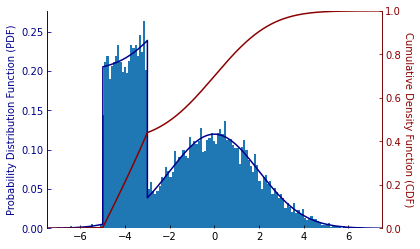

In [5]:
plot_compound(x, CDF, PDF, sample, bins=150)

**Example 2**: In this example, we combine one Unifrom, one Normal (Gaussian), and one Exponential distribution and take 50,000 samples from the resulting compound PDF: 

In [6]:
weights = [.2, .3, .5]
N_s = 50000
x = np.linspace(-7.5, 7.5, 100000)
uniform_distribution = uniform(1, 3) 
normal_distribution = norm(1, .5)
exp_distribution = expon(-6, 2)
cdist = compound_distribution([uniform_distribution, normal_distribution, exp_distribution], weights)
PDF = cdist.pdf(x)
CDF = cdist.cdf(x)
sample = cdist.rvs(N_s)

Using the helper function, we can plot the CDF, PDF, and histogram of the sample:

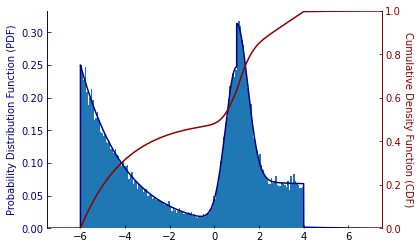

In [7]:
plot_compound(x, CDF, PDF, sample, bins=300)